In [1]:
from sympy import symbols, init_printing, BlockMatrix, MatrixSymbol, Matrix, block_collapse
from sympy import Identity, ZeroMatrix, Eq, DiagonalMatrix
from sympy import solve, conjugate, Symbol, factor, simplify
from sympy.physics.quantum import Dagger
init_printing()

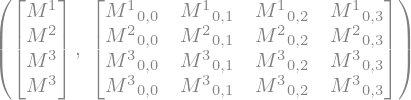

In [2]:
m1 = MatrixSymbol(r'{{M^{1}}}', 1, 4)
m2 = MatrixSymbol(r'{{M^{2}}}', 1, 4)
m3 = MatrixSymbol(r'{{M^{3}}}', 1, 4)
m4 = MatrixSymbol(r'{{M^{3}}}', 1, 4)
M = BlockMatrix([
    [m1],
    [m2],
    [m3],
    [m4]
])
M, M.as_explicit()

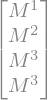

In [3]:
display(M)

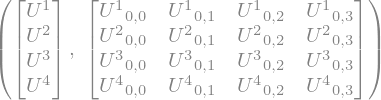

In [4]:
u1 = MatrixSymbol(r'{{U^{1}}}', 1, 4)
u2 = MatrixSymbol(r'{{U^{2}}}', 1, 4)
u3 = MatrixSymbol(r'{{U^{3}}}', 1, 4)
u4 = MatrixSymbol(r'{{U^{4}}}', 1, 4)
U = BlockMatrix([
    [u1],
    [u2],
    [u3],
    [u4]
])
U, U.as_explicit()

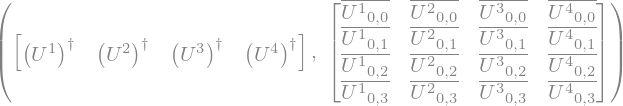

In [5]:
UDagger = BlockMatrix([
    [Dagger(u1), Dagger(u2), Dagger(u3), Dagger(u4)],
])
UDagger, UDagger.as_explicit()

In [6]:
UDU = block_collapse(UDagger*U)

In [7]:
UDU

From the last result we can write one product in term of the other ones. We obtain the unitary condition

In [8]:
UDU - Dagger(u4)*u4

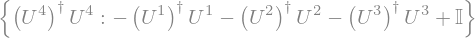

In [9]:
unitary_condition = {Dagger(u4)*u4: Identity(4) - (UDU - Dagger(u4)*u4)}
unitary_condition

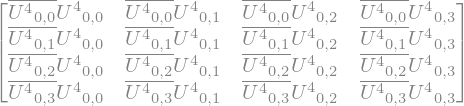

In [10]:
u4Du4_explicit = (Dagger(u4)*u4).as_explicit()
u4Du4_explicit

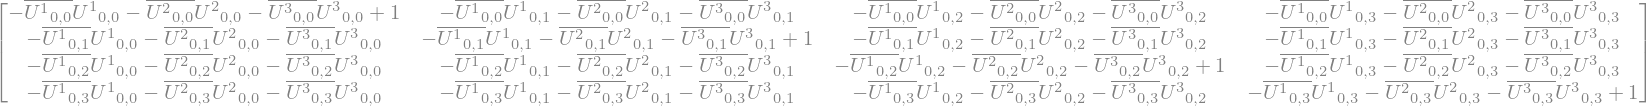

In [11]:
(unitary_condition[Dagger(u4)*u4]).as_explicit()

In [12]:
from neutrinos import UpmnsStandardParametrization, NuOscObservables
th12, th13, th23 = symbols(r'\theta_{12},\theta_{13},\theta_{23}', real=True)
Upmns = UpmnsStandardParametrization(th12, th13, th23)

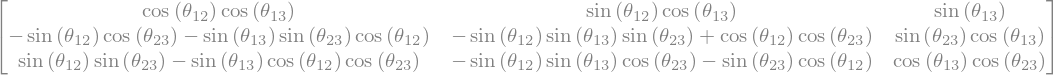

In [13]:
Upmns

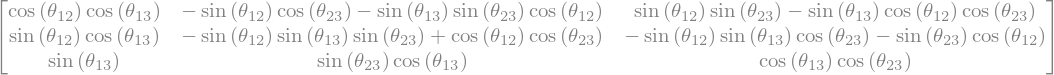

In [14]:
Dagger(Upmns)

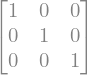

In [15]:
simplify(Upmns.T*Upmns)

In [16]:
Upmns1_changes = {u1[0,i]:Upmns[0,i] for i in range(3)}
Upmns2_changes = {u2[0,i]:Upmns[1,i] for i in range(3)}
Upmns3_changes = {u3[0,i]:Upmns[2,i] for i in range(3)}

In [17]:
Upmns1_changes

In [17]:
block_collapse(UDU.subs(unitary_condition))

In [19]:
unitary_condition_matrix = (unitary_condition[Dagger(u4)*u4]).as_explicit().subs(
    Upmns1_changes
).subs(
    Upmns2_changes
).subs(
    Upmns3_changes
).simplify()

In [20]:
unitary_condition_explicit = {u4Du4_explicit[i,j]:unitary_condition_matrix[i,j] for i in range(4) for j in range(4)}

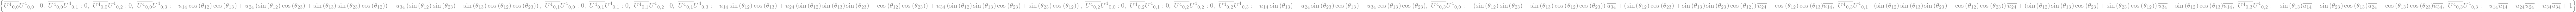

In [21]:
unitary_condition_explicit

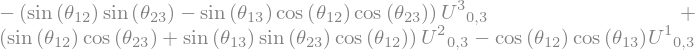

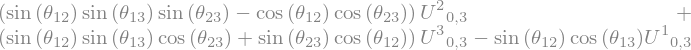

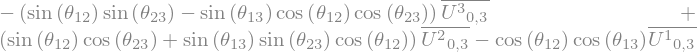

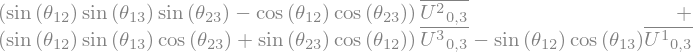

In [81]:
u4u4_components_not_zero = []
u4u4_components_zero = []
for uu, val in unitary_condition_explicit.items():
    if val!=0:
        u4u4_components_not_zero.append(uu)
        display(uu, val)
    else:
        u4u4_components_zero.append(uu)

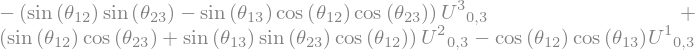

In [82]:
unitary_condition_explicit[u4u4_components_not_zero[0]]

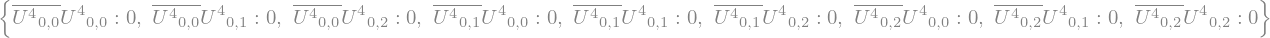

In [85]:
unitary_condition_components_zeros = {uu:0 for uu in u4u4_components_zero}
unitary_condition_components_zeros

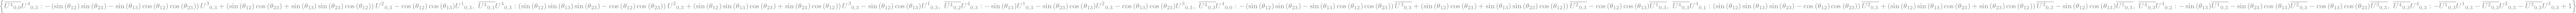

In [128]:
unitary_condition_components_not_zeros = {uu:unitary_condition_explicit[uu] for uu in u4u4_components_not_zero}
unitary_condition_components_not_zeros

## Diagonalization

In [86]:
mlight = block_collapse(UDagger*M*U)

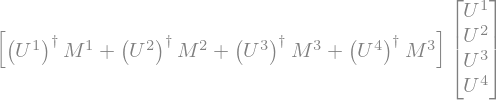

In [88]:
mlight

In [106]:
mnu1 = MatrixSymbol('{{m_1}}', 1, 1)
mnu2 = MatrixSymbol('{{m_2}}', 1, 1)
mnu3 = MatrixSymbol('{{m_3}}', 1, 1)
mnu4 = MatrixSymbol('{{m_4}}', 1, 1)

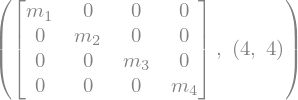

In [107]:
Mdiag = BlockMatrix([
    [mnu1, ZeroMatrix(1, 1), ZeroMatrix(1, 1), ZeroMatrix(1, 1)],
    [ZeroMatrix(1, 1), mnu2, ZeroMatrix(1, 1), ZeroMatrix(1, 1)],
    [ZeroMatrix(1, 1), ZeroMatrix(1, 1), mnu3, ZeroMatrix(1, 1)],
    [ZeroMatrix(1, 1), ZeroMatrix(1, 1), ZeroMatrix(1, 1), mnu4]
])


Mdiag, Mdiag.shape

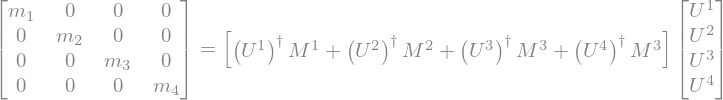

In [108]:
Eq(Mdiag, mlight)

In [109]:
mlight.args[0].blocks[0,0].shape

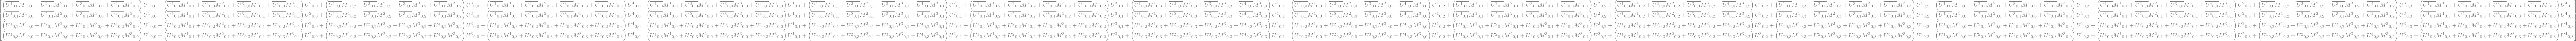

In [110]:
mlight_explicit = mlight.as_explicit()
mlight_explicit

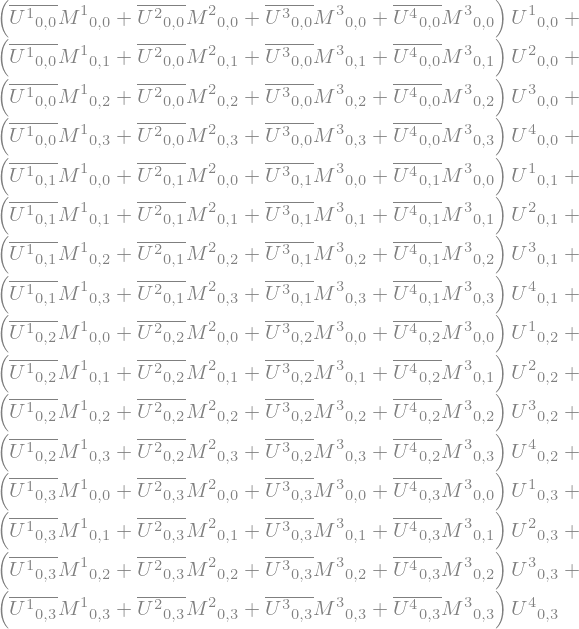

In [243]:
mlight_explicit.trace()

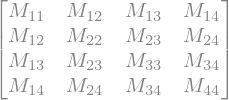

In [268]:
M11, M12, M13, M14 = symbols('M_{11}, M_{12}, M_{13}, M_{14}')
M21, M22, M23, M24 = symbols('M_{21}, M_{22}, M_{23}, M_{24}')
M31, M32, M33, M34 = symbols('M_{31}, M_{32}, M_{33}, M_{34}')
M41, M42, M43, M44 = symbols('M_{41}, M_{42}, M_{43}, M_{44}') 
Mexp = Matrix(
    [
        [M11, M12, M13, M14],
        [M12, M22, M23, M24],
        [M13, M23, M33, M34],
        [M14, M24, M34, M44]
    ]
)
Mexp

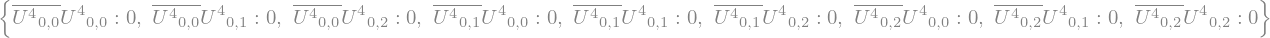

In [269]:
unitary_condition_components_zeros

In [270]:
mlight_f = mlight.subs(m1, Mexp.row(0)).subs(m2, Mexp.row(1)).subs(m3, Mexp.row(2)).subs(m4, Mexp.row(3)).as_explicit(
    
).expand().subs(
    unitary_condition_components_zeros
).subs(
    unitary_condition_components_not_zeros
).subs(
    Upmns1_changes
).subs(
    Upmns2_changes
).subs(
    Upmns3_changes
).factor()

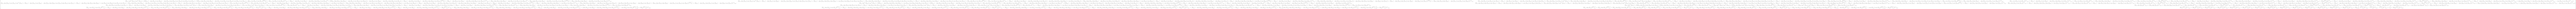

In [271]:
mlight_f

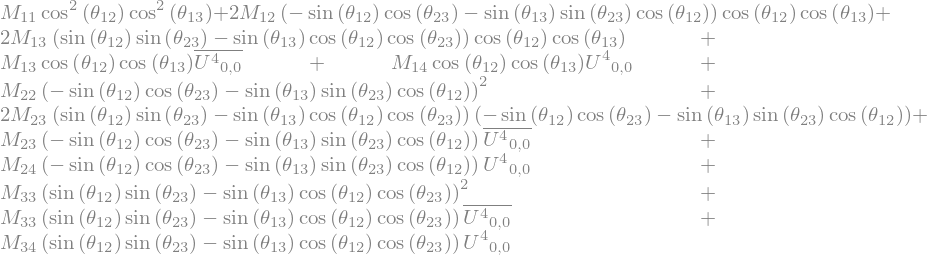

In [274]:
mlight_f[0,0]

In [258]:
from sympy.matrices.expressions import CompanionMatrix

In [263]:
#mlight_charpoly = mlight_f.charpoly()

In [264]:
#CompanionMatrix(mlight_charpoly)

## Inverse transformation

In [112]:
UMdiagUD = block_collapse(U*Mdiag*UDagger)

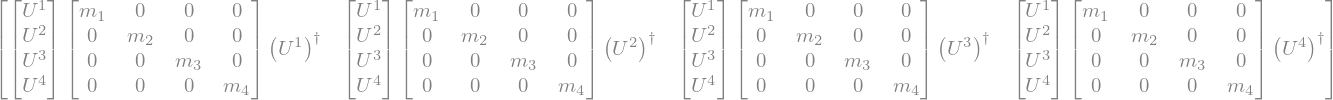

In [113]:
UMdiagUD

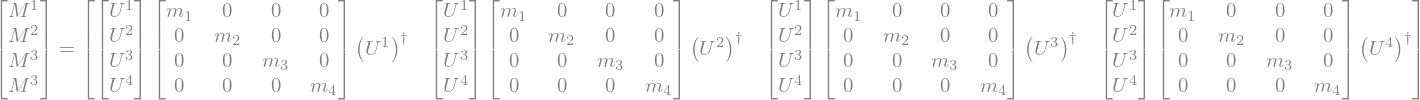

In [114]:
Eq(M, UMdiagUD)

In [115]:
UMdiagUD_explicit = UMdiagUD.as_explicit()

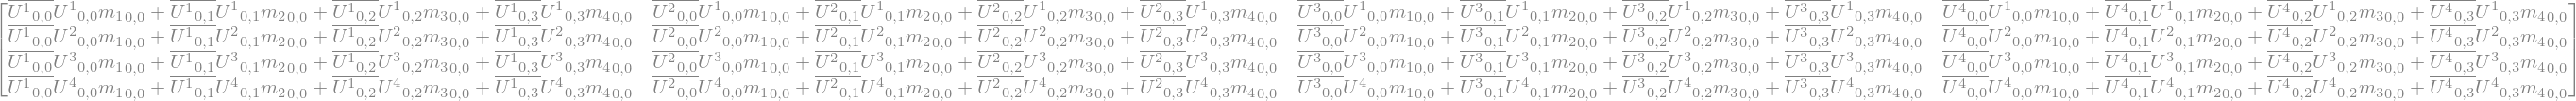

In [116]:
UMdiagUD_explicit

In [119]:
mnu1[0, 0]

In [125]:
mn1, mn2, mn3, mn4 = symbols(r'm_{\nu_1}, m_{\nu_2}, m_{\nu_3}, m_{\nu_4}')
mn_subs = {
    mnu1[0, 0]:mn1,
    mnu2[0, 0]:mn2,
    mnu3[0, 0]:mn3,
    mnu4[0, 0]:mn4
}

In [130]:
UMdiagUD_conditions = UMdiagUD_explicit.subs(mn_subs).subs(unitary_condition_components_zeros).subs(
    unitary_condition_components_not_zeros
).subs(
    Upmns1_changes
).subs(
    Upmns2_changes
).subs(
    Upmns3_changes
)

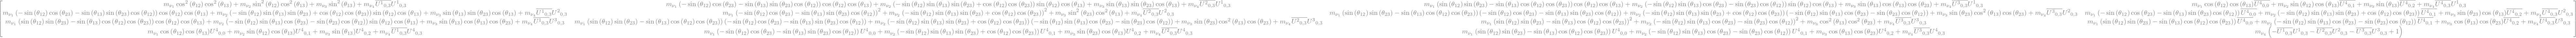

In [275]:
UMdiagUD_conditions

Por la propiedad de simetría de la matriz $M$

In [276]:
MM = M.as_explicit()
eq12 = Eq((UMdiagUD_conditions[0, 1] - UMdiagUD_conditions[1, 0]).simplify(), 0)
eq13 = Eq((UMdiagUD_conditions[0, 2] - UMdiagUD_conditions[2, 0]).simplify(), 0)
eq14 = Eq((UMdiagUD_conditions[0, 3] - UMdiagUD_conditions[3, 0]).collect(mn4), 0)
eq23 = Eq((UMdiagUD_conditions[1, 2] - UMdiagUD_conditions[2, 1]).simplify(), 0)
eq24 = Eq((UMdiagUD_conditions[1, 3] - UMdiagUD_conditions[3, 1]).collect(mn4), 0)
eq34 = Eq((UMdiagUD_conditions[2, 3] - UMdiagUD_conditions[3, 2]).collect(mn4), 0)

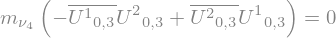

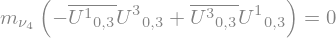

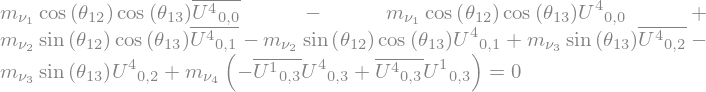

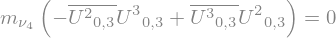

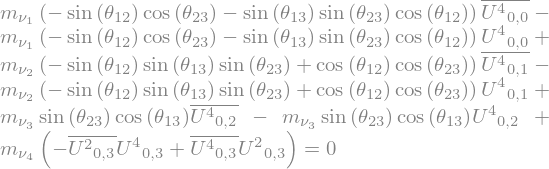

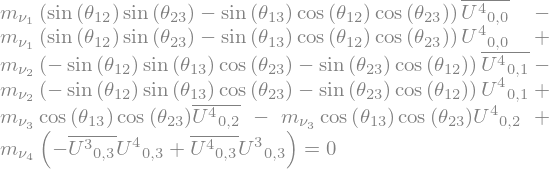

In [277]:
display(eq12)
display(eq13)
display(eq14)
display(eq23)
display(eq24)
display(eq34)

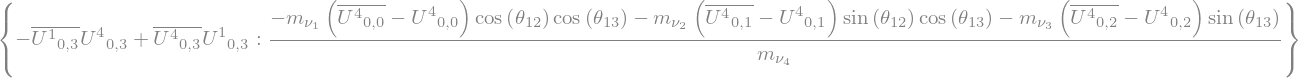

In [278]:
u1_03D_u4_03 = solve(eq14, -conjugate(u1[0,3])*u4[0,3] + conjugate(u4[0,3])*u1[0,3], dict=True)[0]
u1_03D_u4_03[-conjugate(u1[0,3])*u4[0,3] + conjugate(u4[0,3])*u1[0,3]] = u1_03D_u4_03[
    -conjugate(u1[0,3])*u4[0,3] + conjugate(u4[0,3])*u1[0,3]
].expand().collect(
    [mn1, mn2, mn3], factor
).simplify()
u1_03D_u4_03

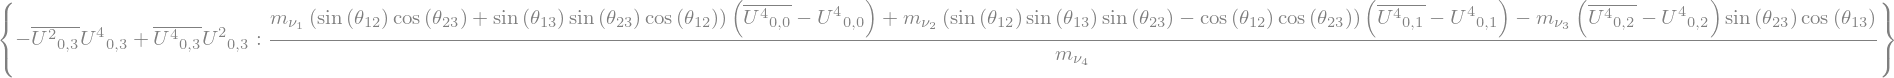

In [279]:
u2_03D_u4_03 = solve(eq24, -conjugate(u2[0,3])*u4[0,3] + conjugate(u4[0,3])*u2[0,3], dict=True)[0]
u2_03D_u4_03[-conjugate(u2[0,3])*u4[0,3] + conjugate(u4[0,3])*u2[0,3]] = u2_03D_u4_03[
    -conjugate(u2[0,3])*u4[0,3] + conjugate(u4[0,3])*u2[0,3]
].expand().collect(
    [mn1, mn2, mn3], factor
).simplify()
u2_03D_u4_03

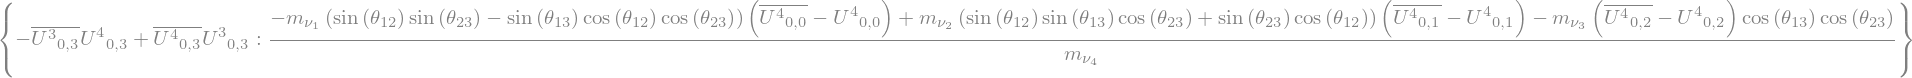

In [280]:
u3_03D_u4_03 = solve(eq34, -conjugate(u3[0,3])*u4[0,3] + conjugate(u4[0,3])*u3[0,3], dict=True)[0]
u3_03D_u4_03[-conjugate(u3[0,3])*u4[0,3] + conjugate(u4[0,3])*u3[0,3]] = u3_03D_u4_03[
    -conjugate(u3[0,3])*u4[0,3] + conjugate(u4[0,3])*u3[0,3]
].expand().collect(
    [mn1, mn2, mn3], factor
).simplify()
u3_03D_u4_03

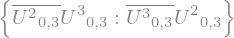

In [281]:
u2_03D_u3_03 = solve(eq23, conjugate(u2[0,3])*u3[0,3], dict=True)[0]
u2_03D_u3_03

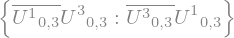

In [282]:
u1_03D_u3_03 = solve(eq13, conjugate(u1[0,3])*u3[0,3], dict=True)[0]
u1_03D_u3_03

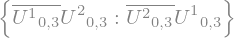

In [283]:
u1_03D_u2_03 = solve(eq12, conjugate(u1[0,3])*u2[0,3], dict=True)[0]
u1_03D_u2_03

i=1


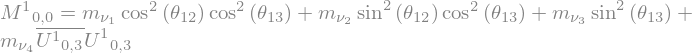

i=2


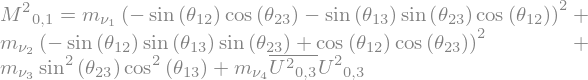

i=3


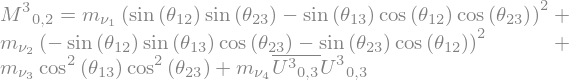

i=4


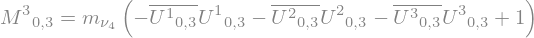

In [229]:
eqs_diag = {}
for i in range(4):
    print(f'i={i+1}')
    eqs_diag[i+1] = Eq(MM[i, i] ,UMdiagUD_conditions[i, i])
    display(eqs_diag[i+1])

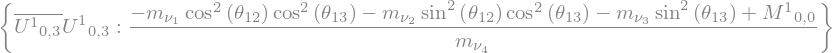

In [233]:
u1_03D_u1_03 = solve(eqs_diag[1], conjugate(u1[0,3])*u1[0,3], dict=True)[0]
u1_03D_u1_03

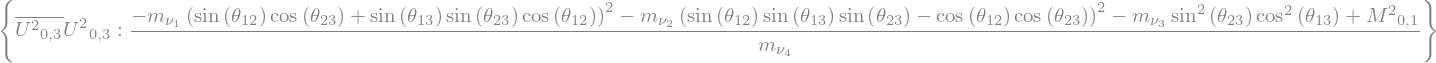

In [234]:
u2_03D_u2_03 = solve(eqs_diag[2], conjugate(u2[0,3])*u2[0,3], dict=True)[0]
u2_03D_u2_03

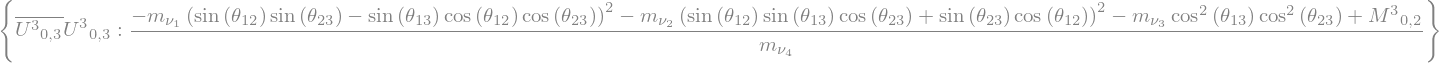

In [235]:
u3_03D_u3_03 = solve(eqs_diag[3], conjugate(u3[0,3])*u3[0,3], dict=True)[0]
u3_03D_u3_03

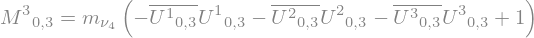

In [287]:
eqs_diag[4]

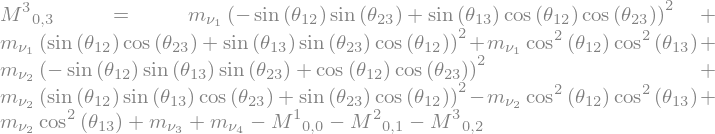

In [239]:
eq44 = eqs_diag[4].subs(u1_03D_u1_03).subs(u2_03D_u2_03).subs(u3_03D_u3_03).simplify()
eq44

In [242]:
eq44_sol = solve(eq44, m3[0,3] + m1[0,0] + m2[0,1] + m3[0,2], dict=True)[0]
eq44_sol

### Invariants

In [289]:
UMdiagUD_trace = UMdiagUD_conditions.trace().subs(u1_03D_u1_03).subs(u2_03D_u2_03).subs(u3_03D_u3_03).simplify()

In [290]:
UMdiagUD_trace

the fast methods to calculate de determinant a `.det(method="berkowitz")` and `.det(method="lu")`

In [323]:
UMdiagUD_det = UMdiagUD_conditions.det(method="berkowitz")

In [325]:
UMdiagUD_det2 = UMdiagUD_det.subs(u1_03D_u1_03).subs(u2_03D_u2_03).subs(u3_03D_u3_03)#.expand().collect([mn1, mn2, mn3, mn4])

In [329]:
UMdiagUD_det2_args = UMdiagUD_det2.args
UMdiagUD_det2.func

sympy.core.add.Add

In [333]:
UMdiagUD_det2_args[0].atoms

In [336]:
from sympy import symbols, expand, factor
from functools import lru_cache

x, y, z = symbols('x y z')

@lru_cache(maxsize=None)
def expand_expr(expr):
    return expand(expr)

expr = (x + y + z)**10
expanded_expr = expand_expr(expr)
factored_expr = factor(expanded_expr)
print(factored_expr)

(x + y + z)**10


In [1]:
# expand_expr(UMdiagUD_det2_args[0])

In [ ]:
for arg in UMdiagUD_det2_args:
    

In [292]:
x = symbols('x')

In [298]:
UMdiagUD_charpoly = (UMdiagUD_conditions - Identity(4).as_explicit()*x).det(method='lu')

In [309]:
from sympy import cse

In [311]:
UMdiagUD_charpoly_cse = cse(UMdiagUD_charpoly)

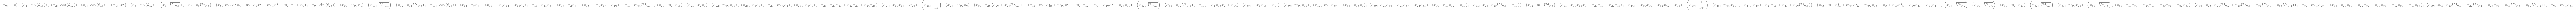

In [312]:
UMdiagUD_charpoly_cse[0]

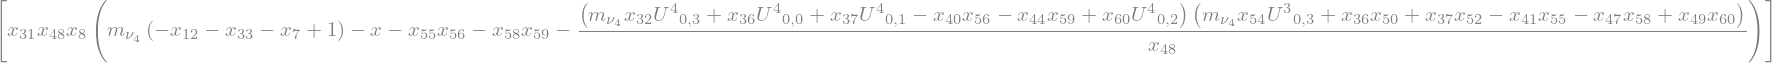

In [313]:
UMdiagUD_charpoly_cse[1]